In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('fraud-transaction')
jovian.set_colab_id('1_Fz7NG0-Mg1eVXtiCZ1hQfzzE80frUlT')

     |████████████████████████████████| 68 kB 2.1 MB/s 


# fraud-transaction- This project deals with the dataset for financial transaction for one month of a company . predicting fraudulent transactions for a financial company and using insights from the model to develop an actionable plan.

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

Download Dataset

from Kaggle

Data Dictionary:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction.

newbalanceDest - new balance recipient 

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
!pip install opendatasets --upgrade

In [5]:
import opendatasets as od

In [6]:
dataset_url= 'https://www.kaggle.com/chitwanmanchanda/fraudulent-transactions-data'

In [7]:
od.download('https://www.kaggle.com/chitwanmanchanda/fraudulent-transactions-data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iamsuruchi
Your Kaggle Key: ··········


100%|██████████| 178M/178M [00:03<00:00, 57.8MB/s]


Pandas part
1. learn more about the data - how many columns 
                               meaning of the columns 
2.Filter data

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/fraudulent-transactions-data/Fraud.csv')

In [10]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

This is the total number of transaction in a month 

In [12]:
len(df)

6362620

This gives the information about the dataset. 
1. There are total 6362620 transaction nin a given month for this company
2.The columns describes the time as per  hour, name , mode of transaction , opening and closing balance for the originator and the destination or customer.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Below the dataset is described like min max , standard deviation 

In [14]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


nameOrig can't be considered as a unique column.NO other field can be treated as a unique column
.oldbalanceOrg	is right skew
.oldbalanceDest is right skew 
.


In [15]:
len(df.nameOrig.unique())

6353307

ASK questions
1. What average amount of  transaction that  has more fraud nature.
2. What is the averge amount of new  account balance of the destination side that has a received a fraud transaction.
3.The likely days of the month having most fraudulent transactions.


Skewness is a measure of asymmetry of a dataset. 

In [16]:
df.skew(axis = 0, skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

In [17]:
numerics=['int64', 'float64']
newdf= df.select_dtypes(include = numerics)

In [18]:
newdf

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [19]:
len(newdf.columns)

8

In [20]:
df.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


No Nan values or missing values

In [21]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [22]:
df.fillna(0)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


NO  Values added


In [23]:
df.isna().sum().sort_values(ascending=False)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

isna() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False

In [24]:
df.isna().sum().sort_values(ascending=False)/len(df)

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

df. isna(). sum() returns the number of missing values in each column. Here above we have given the percentage of missing elements among the total number of elements for each column in descending order.

In [25]:
len(df)

6362620

calculation and sorting the NA values 

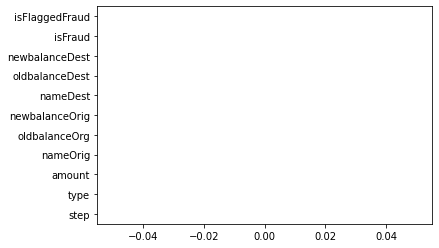

In [26]:
df.isna().sum().sort_values(ascending=False).plot(kind='barh')

##Here we will perform Data Preprocessing on our matches dataset first, to make the data usable for EDA

In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [28]:
newdf.sum(axis = 0 , skipna=True)

step              1.548644e+09
amount            1.144393e+12
oldbalanceOrg     5.305681e+12
newbalanceOrig    5.440763e+12
oldbalanceDest    7.003346e+12
newbalanceDest    7.794187e+12
isFraud           8.213000e+03
isFlaggedFraud    1.600000e+01
dtype: float64

newdf is a series and represents the sum of values for all rows 

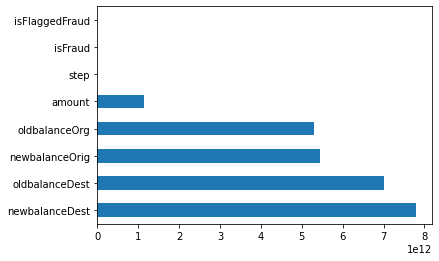

In [29]:
newdf.sum().sort_values(ascending=False).plot(kind='barh')

In [30]:
missing_percentage= df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage[missing_percentage!=0]

Series([], dtype: float64)

Data Preprocessing-


In [31]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Text(0.5, 1.0, 'Violin Plot of amount by type, Separated by payment type')

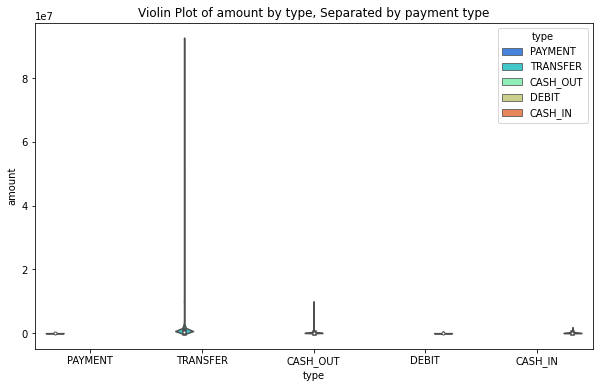

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
sns.violinplot(x='type',y="amount",data=df, hue='type', palette='rainbow')
plt.title("Violin Plot of amount by type, Separated by payment type")

Transfer has the highest. Plot not that useful.

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.]),
 <a list of 6 Text major ticklabel objects>)

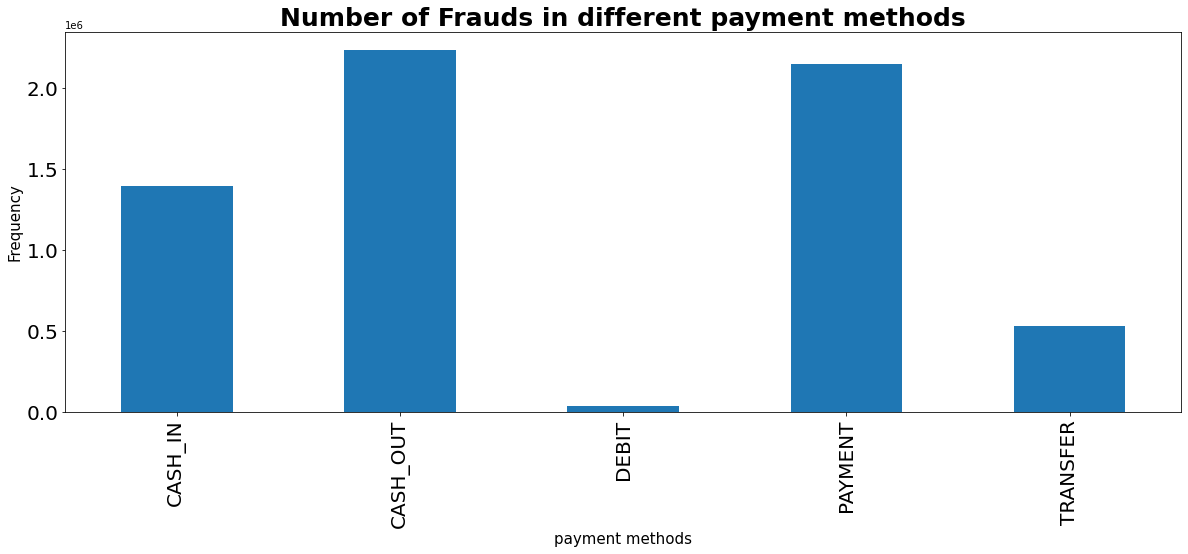

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting TRANSACTIONS  along with PAYMENT METHOD
v = pd.crosstab(df['type'],df['isFraud'])
#v.replace(v[v!=0],1, inplace = True)

#Adding a column by summing each columns
v['count'] = v.sum(axis = 'columns')
#We will just keep last column = 'count'
b = v['count']

#Plotting
plt.figure(figsize = (20,7))
b.plot(kind = 'bar')
plt.title("Number of Frauds in different payment methods", fontsize = 25, fontweight = 'bold')
plt.xlabel("payment methods", size = 15)
plt.ylabel("Frequency", size = 15)
plt.xticks(size = 20)
plt.yticks(size = 20)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text major ticklabel objects>)

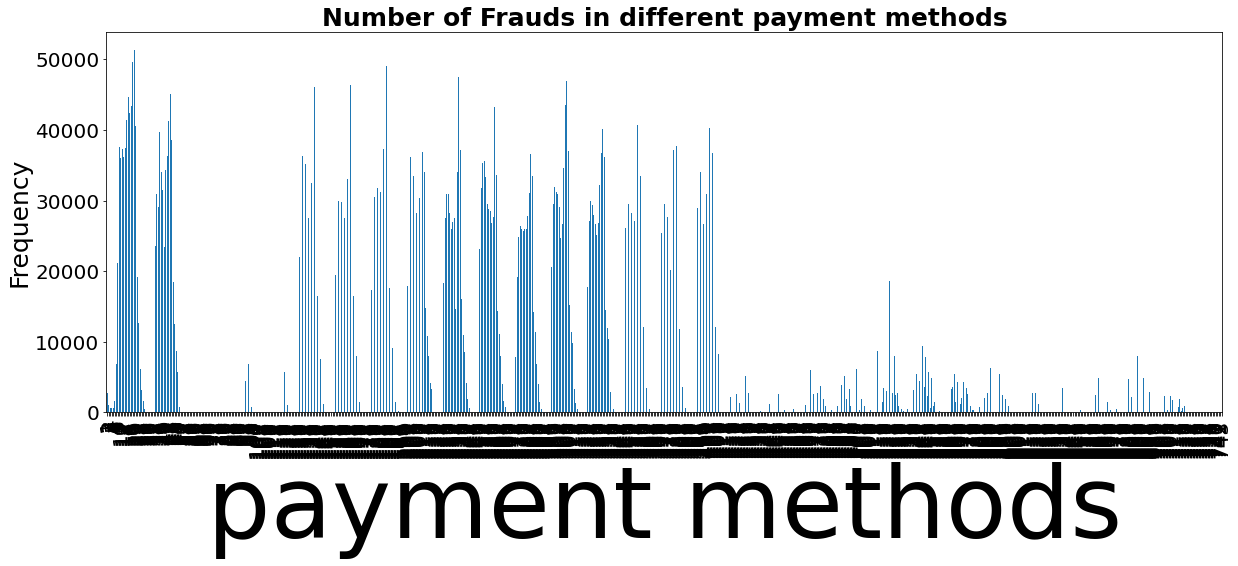

In [34]:
# Plotting TRANSACTIONS  along with PAYMENT METHOD
v = pd.crosstab(df['step'],df['isFraud'])
#v.replace(v[v!=0],1, inplace = True)

#Adding a column by summing each columns
v['count'] = v.sum(axis = 'columns')
#We will just keep last column = 'count'
b = v['count']

#Plotting
plt.figure(figsize = (20,7))
b.plot(kind = 'bar')
plt.title("Number of Frauds in different payment methods", fontsize = 25, fontweight = 'bold')
plt.xlabel("payment methods", size =100)
plt.ylabel("Frequency", size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)